In [6]:
import json
import zipfile
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cmath
from scipy import stats
#from impyute.imputation.cs import fast_knn

In [7]:
test = None
data_test = None
with zipfile.ZipFile("/home/qizhouc/CMPT459/test.json.zip", "r") as z:
    for filename in z.namelist():
        print(filename)
        with z.open(filename) as f:
            data_test = f.read()
            test = json.loads(data_test.decode("utf-8"))

test.json


In [8]:
train = None
data_train = None
with zipfile.ZipFile("/home/qizhouc/CMPT459/train.json.zip", "r") as z:
    for filename in z.namelist():
        print(filename)
        with z.open(filename) as f:
            data_train = f.read()
            train = json.loads(data_train.decode("utf-8"))

train.json


In [9]:
my_df2 = pd.DataFrame(train)
my_df1 = pd.DataFrame(test)

In [10]:
print(my_df2)

        bathrooms  bedrooms                       building_id  \
4             1.0         1  8579a0b0d54db803821a35a4a615e97a   
6             1.0         2  b8e75fc949a6cd8225b455648a951712   
9             1.0         2  cd759a988b8f23924b5a2058d5ab2b49   
10            1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
15            1.0         0  bfb9405149bfff42a92980b594c28234   
...           ...       ...                               ...   
124000        1.0         3  92bbbf38baadfde0576fc496bd41749c   
124002        1.0         2  5565db9b7cba3603834c4aa6f2950960   
124004        1.0         1  67997a128056ee1ed7d046bbb856e3c7   
124008        1.0         2  3c0574a740154806c18bdf1fddd3d966   
124009        1.0         3  d89f514c3ed0abaae52cba7017ac0701   

                    created  \
4       2016-06-16 05:55:27   
6       2016-06-01 05:44:33   
9       2016-06-14 15:19:59   
10      2016-06-24 07:54:24   
15      2016-06-28 03:50:23   
...                     ...   
12

In [ ]:
for i in range(0,49352)


In [36]:
print('Q1',my_df2.price.quantile(.25))
print('Q1',my_df2.price.quantile(.5))
print('Q1',my_df2.price.quantile(.75))
IQR = my_df2.price.quantile(.75) - my_df2.price.quantile(.25)
print('Lower_Bound',my_df2.price.quantile(.25) - 1.5*IQR)
print('Upper_Bound',my_df2.price.quantile(.75) + 1.5*IQR)

Q1 2500.0
Q1 3150.0
Q1 4100.0
Lower_Bound 100.0
Upper_Bound 6500.0


In [33]:
#use IQR to determin outlier
Q1 = (49352+1)*0.25
Q2 = (49352+1)*0.5
Q3 = (49352+1)*0.75

In [32]:
bins = [500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,100000000000]
my_df2['PriceInterval'] = pd.cut(my_df2['price'],bins)
df2_count = pd.value_counts(my_df2.PriceInterval,sort = False)
print(df2_count)

(500, 1000]                18
(1000, 1500]              678
(1500, 2000]             4610
(2000, 2500]             8126
(2500, 3000]             9719
(3000, 3500]             7899
(3500, 4000]             5543
(4000, 4500]             3144
(4500, 5000]             2691
(5000, 5500]             1681
(5500, 6000]             1477
(6000, 6500]              977
(6500, 7000]              571
(7000, 7500]              395
(7500, 8000]              351
(8000, 8500]              171
(8500, 9000]              169
(9000, 9500]               99
(9500, 10000]             152
(10000, 100000000000]     878
Name: PriceInterval, dtype: int64


In [37]:
max2= my_df2.price.max()
print(max2)
my_df2.drop(my_df2[my_df2.price < 100].index, inplace = True)


4490000


In [38]:
min2= my_df2.price.min()
print(min2)
my_df2.drop(my_df2[my_df2.price >6500].index, inplace = True)


401


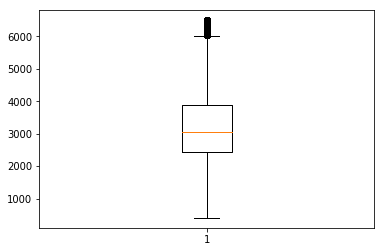

In [39]:
plt.boxplot(x = my_df2.price, whis = 1.5)
plt.show()

In [103]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',20)
pd.set_option('display.width',1000)

In [104]:
#print (my_df2)

In [28]:
#bins = [0,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500,3750,4000,4250,4500,4750,5000,5250,5500,5750,6000,6250,6500,6750,7000,7250,7500,7750,8000,8250,8500,8750,9000,9250,9500,9750,10000,10250,10500,10750,11000,11250,11500,11750,12000,12250,12500,12750,13000,13250,13500,13750,14000,14250,14500,14750,15000,50000]
bins = [500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000]
my_df2['PriceInterval'] = pd.cut(my_df2['price'],bins)
df2_count = pd.value_counts(my_df2.PriceInterval,sort = False)
print(df2_count)

(500, 1000]        18
(1000, 1500]      678
(1500, 2000]     4610
(2000, 2500]     8126
(2500, 3000]     9719
(3000, 3500]     7899
(3500, 4000]     5543
(4000, 4500]     3144
(4500, 5000]     2691
(5000, 5500]     1681
(5500, 6000]     1477
(6000, 6500]      977
(6500, 7000]      571
(7000, 7500]      395
(7500, 8000]      351
(8000, 8500]      171
(8500, 9000]      169
(9000, 9500]       99
(9500, 10000]     152
Name: PriceInterval, dtype: int64


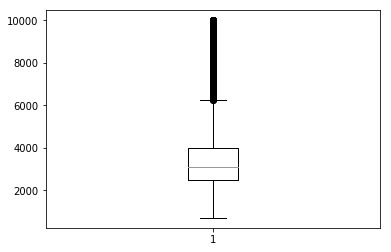

In [29]:
plt.boxplot(x = my_df2.price, whis = 1.5)
plt.show()

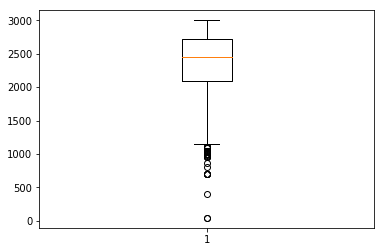

In [72]:
my_df2.drop(my_df2[my_df2.price > 30000].index, inplace = True)
plt.boxplot(x = my_df2.price, whis = 1.5)
plt.show()

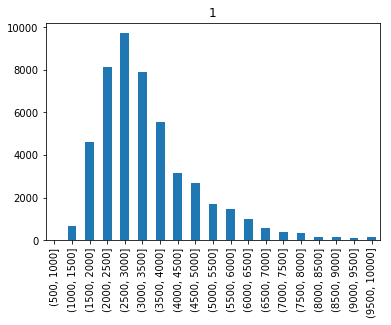

In [30]:
df2_count.plot(kind = 'bar', title = '1')
#ax = plt.subplot()
#ax.bar(range(5),range(5),width = 1, bottom = 10)
#my_df2.groupby('price').plot( kind = 'bar', title = '1')
#plt.xticks(rotation = 'horizontal')
#plt.xticks(np.linspace(0,50,100))
plt.show()


In [33]:
sample_mean = my_df2.price.mean()

In [34]:
print(sample_mean)

3830.174035500081


In [64]:
sample_std = my_df2.price.std()
ub = sample_mean + 1.960 * sample_std 
lb = sample_mean - 1.960 * sample_std 
print(sample_std)
print(ub)
print(lb)

22066.86588468595
47081.23116948454
-39420.88309848438


In [49]:
#t_ci = 1.960
#z value of 95% CI
#se = stats.sem(my_df2.price)
#a = sample_mean - t_ci * se
#b = sample_mean + t_ci * se
my_df2.drop(my_df2[my_df2.price > ub].index, inplace = True)
my_df2.drop(my_df2[my_df2.price < lb].index, inplace = True)

In [50]:
bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,50000]
my_df2['PriceInterval'] = pd.cut(my_df2['price'],bins)
df2_count = pd.value_counts(my_df2.PriceInterval,sort = False)
print(df2_count)

(0, 1000]            21
(1000, 2000]       5288
(2000, 3000]      17845
(3000, 4000]      13442
(4000, 5000]       5835
(5000, 6000]       3158
(6000, 7000]       1548
(7000, 8000]        746
(8000, 9000]        340
(9000, 10000]       251
(10000, 11000]      138
(11000, 12000]      157
(12000, 13000]      102
(13000, 14000]      116
(14000, 15000]      109
(15000, 16000]       38
(16000, 17000]       29
(17000, 18000]       27
(18000, 19000]       20
(19000, 20000]       33
(20000, 50000]       89
Name: PriceInterval, dtype: int64
